In [10]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_theme()

In [11]:
from cnn.layers import Linear, ReLU, Softmax
from cnn.optim import Adam
from cnn.loss import CrossEntropyLoss
from cnn.utils import train_val_test_split, batch_generator, train
from cnn import Module

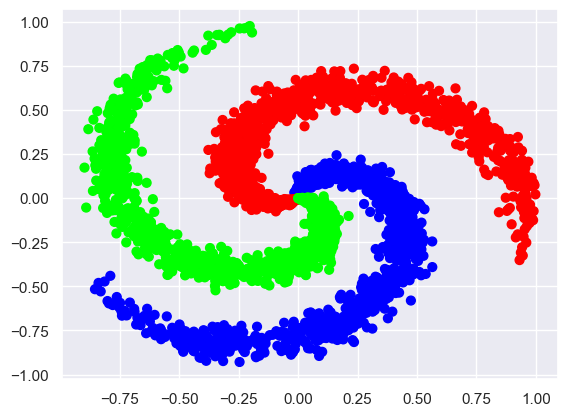

In [25]:
# Dataset from https://cs231n.github.io/neural-networks-case-study/ 

N = 1000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [26]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)
B = 32


In [27]:
class Net(Module):
  def __init__(self, input_dims, num_classes, loss_func = CrossEntropyLoss, optimizer = Adam, dropout_probability=0.0):
    super().__init__()
    self.loss_func = loss_func()
    self.optimizer = optimizer()

    self.fc1 = Linear(input_dims, 256)
    self.relu1 = ReLU()
    self.fc2 = Linear(256, 64)
    self.relu2 = ReLU()
    self.fc3 = Linear(64, num_classes)
    self.softmax = Softmax()

  def forward(self, x):
    x = self.relu1.forward(self.fc1.forward(x))
    x = self.relu2.forward(self.fc2.forward(x))
    x = self.softmax.forward(self.fc3.forward(x))
    return x
  
  def backward(self, output, target):
    dvalues = self.loss_func.backward(output, target)
    
    dvalues = self.softmax.backward(dvalues)
    dvalues = self.fc3.backward(dvalues)
    dvalues = self.relu2.backward(dvalues)
    dvalues = self.fc2.backward(dvalues)
    dvalues = self.relu1.backward(dvalues)
    dvalues = self.fc1.backward(dvalues)
    return dvalues

  def optimize(self):
    self.optimizer.update_params(self.fc1)
    self.optimizer.update_params(self.fc2)
    self.optimizer.update_params(self.fc3)
  
  def zero_grad(self):
    self.fc1.zero_grad()
    self.fc2.zero_grad()
    self.fc3.zero_grad()

  def calculate_loss(self, output, target):
    return self.loss_func.calculate(output, target)

In [28]:
EPOCHS = 100
lr = 0.0001 

model = Net(D, K)


In [29]:
train_losses, train_accuracies, val_losses, val_accuracies = train(model, X_train, y_train, X_val, y_val)

Epoch 1, Train Loss: 0.030836, Train Accuracy: 0.512857, Val Loss: 0.027625, Val Accuracy: 0.626667
Epoch 2, Train Loss: 0.020885, Train Accuracy: 0.713810, Val Loss: 0.019687, Val Accuracy: 0.757778
Epoch 3, Train Loss: 0.018264, Train Accuracy: 0.759524, Val Loss: 0.019544, Val Accuracy: 0.755556
Epoch 4, Train Loss: 0.017125, Train Accuracy: 0.765714, Val Loss: 0.018627, Val Accuracy: 0.764444
Epoch 5, Train Loss: 0.016615, Train Accuracy: 0.769048, Val Loss: 0.018170, Val Accuracy: 0.775556
Epoch 6, Train Loss: 0.016102, Train Accuracy: 0.777619, Val Loss: 0.017006, Val Accuracy: 0.791111
Epoch 7, Train Loss: 0.015122, Train Accuracy: 0.786667, Val Loss: 0.015720, Val Accuracy: 0.797778
Epoch 8, Train Loss: 0.012832, Train Accuracy: 0.809524, Val Loss: 0.012843, Val Accuracy: 0.837778
Epoch 9, Train Loss: 0.010560, Train Accuracy: 0.844762, Val Loss: 0.010918, Val Accuracy: 0.855556
Epoch 10, Train Loss: 0.008849, Train Accuracy: 0.875714, Val Loss: 0.009031, Val Accuracy: 0.926667

In [30]:
def plot_decision_boundary(model):
  x_1 = np.arange(-1, 1, 0.01)
  x_2 = np.arange(-1, 1, 0.01)
  X_1, X_2 = np.meshgrid(x_1, x_2)

  X_grid = np.c_[X_1.flatten(), X_2.flatten()]
  output = model(X_grid)

  pred = np.argmax(output, axis=1)
  Z = pred.reshape(X_1.shape)

  plt.figure(figsize=(6, 5))
  plt.contourf(X_1, X_2, Z, cmap='brg')

  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel('X_1')
  plt.ylabel('X_2')
  plt.title('Model Predictions')
  plt.show()


# def plot_decision_boundary(model):
#   x_1 = np.arange(-1, 1, 0.01)
#   x_2 = np.arange(-1, 1, 0.01)
#   X_1, X_2 = np.meshgrid(x_1, x_2)

#   X_grid = np.c_[X_1.flatten(), X_2.flatten()]
#   X_tensor = torch.tensor(X_grid, dtype=torch.float32)  

#   model.eval()
#   with torch.no_grad():
#     output = model(X_tensor)

#   _, pred = torch.max(output, dim=1)
#   Z = pred.reshape(X_1.shape)

#   plt.figure(figsize=(6, 5))
#   plt.contourf(X_1, X_2, Z, cmap='brg')

#   plt.xlim(-1,1)
#   plt.ylim(-1,1)
#   plt.xlabel('X_1')
#   plt.ylabel('X_2')
#   plt.title('Model Predictions')
#   plt.show()


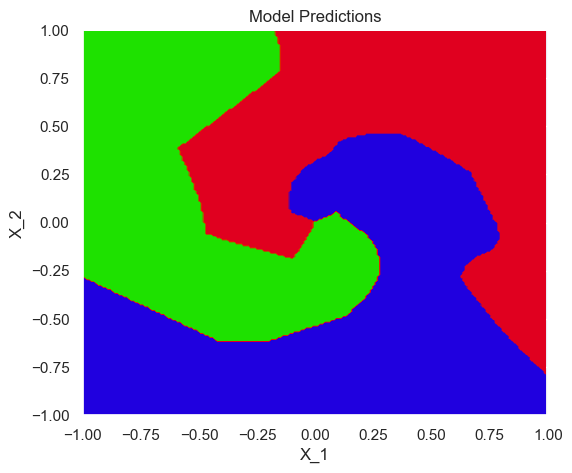

In [31]:
plot_decision_boundary(model)